## Data Analysis of Unicorn Companies

This notebook presents an exploratory data analysis (EDA) of a dataset containing information on global unicorn companies (privately held startups valued at over $1 billion). The primary goal of this project is to uncover trends, patterns, and insights related to their growth, funding, and industry distribution.


## 1. Data Loading and Initial Inspection

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


data = pd.read_csv('Unicorn_Companies.csv')

df = data.copy()
# Print the column names 
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1074 entries, 0 to 1073
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Company           1074 non-null   object
 1   Valuation         1074 non-null   object
 2   Date Joined       1074 non-null   object
 3   Industry          1074 non-null   object
 4   City              1058 non-null   object
 5   Country           1074 non-null   object
 6   Continent         1074 non-null   object
 7   Year Founded      1074 non-null   int64 
 8   Funding           1074 non-null   object
 9   Select Investors  1073 non-null   object
dtypes: int64(1), object(9)
memory usage: 84.0+ KB
None


In [2]:
df.describe()

,Year Founded
count,1074.000000
mean,2012.895717
std,5.698573
min,1919.000000
25%,2011.000000
50%,2014.000000
75%,2016.000000
max,2021.000000


In [3]:
df.columns

Index(['Company', 'Valuation', 'Date Joined', 'Industry', 'City', 'Country',
       'Continent', 'Year Founded', 'Funding', 'Select Investors'],
      dtype='object')

In [4]:
## Check for Null Values
df.isna().sum()

Company              0
Valuation            0
Date Joined          0
Industry             0
City                16
Country              0
Continent            0
Year Founded         0
Funding              0
Select Investors     1
dtype: int64

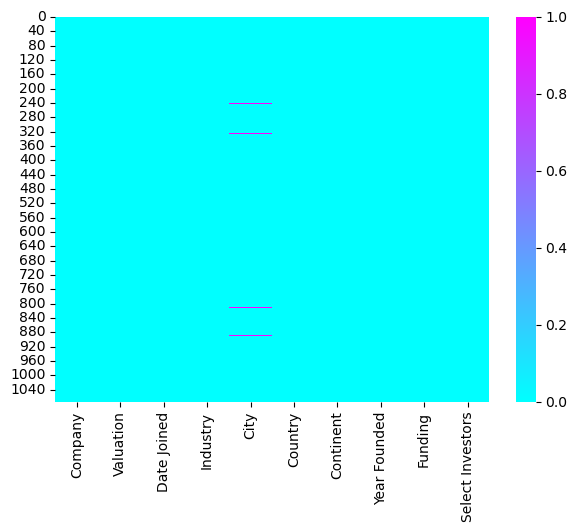

In [5]:
##create a heatmap to visualize these values
plt.figure(figsize =(7,5))
sns.heatmap(df.isnull(),cbar= True, cmap="cool")
plt.show()

 there are 16 n/a values in the city column and 1 in the select investor column


## 2. Data Cleaning and Preprocessing

In [6]:
# Lets look through the data column by column starting with company
df['Company'].value_counts()

Company
Bolt               2
Bytedance          1
Yidian Zixun       1
Klook              1
Epirus             1
                  ..
eDaili             1
ENOVATE            1
Fenbi Education    1
Hesai Tech         1
Zwift              1
Name: count, Length: 1073, dtype: int64

In [7]:
## we notice that there are two Bolt Cpmpanies, lets look into that
bolt_df = df[df['Company'] == "Bolt"] 
bolt_df

,Company,Valuation,Date Joined,Industry,City,Country,Continent,Year Founded,Funding,Select Investors
40,Bolt,$11B,2018-05-29,Auto & transportation,Tallinn,Estonia,Europe,2013,$1B,"Didi Chuxing, Diamler, TMT Investments"
44,Bolt,$11B,2021-10-08,Fintech,San Francisco,United States,North America,2014,$1B,"Activant Capital, Tribe Capital, General Atlantic"


 we can see the bolt companies are seperate companies

In [8]:
# Remove '$' and 'B' from `Valuation` column and convert to numeric
df['Valuation'] = df['Valuation'].str.replace('$', '').str.replace('B', '').astype(float)

In [9]:
df['Valuation']

0       180.0
1       100.0
2       100.0
3        95.0
4        46.0
        ...  
1069      1.0
1070      1.0
1071      1.0
1072      1.0
1073      1.0
Name: Valuation, Length: 1074, dtype: float64

In [10]:
##Replace '$','B' and 'M' from the column and change the data type to integer
df['Funding'] = df['Funding'].astype(str).replace('([^\w/-])','', regex = True).replace(["B","M"],"" ,regex = True).replace('Unknown','0',regex= True).astype(int)
df['Funding']=np.where(df['Funding'] == 0,df['Funding'].mode() ,df['Funding'])

## Standadize the column
df['Funding']=np.where(df['Funding']>15,df["Funding"]/1000,df["Funding"])
df['Funding']

0       8.000
1       7.000
2       2.000
3       2.000
4       4.000
        ...  
1069    0.379
1070    0.990
1071    0.080
1072    0.792
1073    0.620
Name: Funding, Length: 1074, dtype: float64

In [11]:
# Convert `Date Joined` to datetime and extract `Year Joined`
df['Date Joined'] = pd.to_datetime(df['Date Joined'])
df['Year Joined'] = df['Date Joined'].dt.year

In [12]:
# Create a `Company Age` column
df['Company Age'] = df['Year Joined'] - df['Year Founded']

In [13]:
# Display the first 5 rows of the cleaned DataFrame
print("Cleaned Data Head:")
df.head()

Cleaned Data Head:


,Company,Valuation,Date Joined,Industry,City,Country,Continent,Year Founded,Funding,Select Investors,Year Joined,Company Age
0,Bytedance,180.0,2017-04-07,Artificial intelligence,Beijing,China,Asia,2012,8.0,"Sequoia Capital China, SIG Asia Investments, S...",2017,5
1,SpaceX,100.0,2012-12-01,Other,Hawthorne,United States,North America,2002,7.0,"Founders Fund, Draper Fisher Jurvetson, Rothen...",2012,10
2,SHEIN,100.0,2018-07-03,E-commerce & direct-to-consumer,Shenzhen,China,Asia,2008,2.0,"Tiger Global Management, Sequoia Capital China...",2018,10
3,Stripe,95.0,2014-01-23,Fintech,San Francisco,United States,North America,2010,2.0,"Khosla Ventures, LowercaseCapital, capitalG",2014,4
4,Klarna,46.0,2011-12-12,Fintech,Stockholm,Sweden,Europe,2005,4.0,"Institutional Venture Partners, Sequoia Capita...",2011,6


In [14]:
df.describe()

,Valuation,Date Joined,Year Founded,Funding,Year Joined,Company Age
count,1074.000000,1074,1074.000000,1074.000000,1074.000000,1074.000000
mean,3.455307,2020-05-19 15:35:51.955307264,2012.895717,0.608725,2019.896648,7.000931
min,1.000000,2007-07-02 00:00:00,1919.000000,0.017000,2007.000000,-4.000000
25%,1.000000,2019-05-20 06:00:00,2011.000000,0.226000,2019.000000,4.000000
50%,2.000000,2021-03-29 00:00:00,2014.000000,0.378500,2021.000000,6.000000
75%,3.000000,2021-09-19 18:00:00,2016.000000,0.638500,2021.000000,9.000000
max,180.000000,2022-04-05 00:00:00,2021.000000,15.000000,2022.000000,98.000000
std,8.547022,NaN,5.698573,1.076820,2.001288,5.329672


"Valuation ": This column shows the valuation of 1074 companies, which ranges from $1 billion to 180 billion. The average valuation is 3.46 billion, and the standard deviation is 8.55 billion.

Date Joined: This column shows the date when each company joined. The earliest date is July 2nd, 2007, and the latest date is April 5th, 2022. The average date is May 19th, 2020, at 

Year Founded: This column shows the year when each company was founded, ranging from 1919 to 2021. The average year founded is November 23rd, 2012, at 

Funding : This column shows the funding of each company, ranging from 0.017 billion to 15 billion. The average funding is 0.61 billion, and the standard deviation is 1.08 billion.




In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1074 entries, 0 to 1073
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Company           1074 non-null   object        
 1   Valuation         1074 non-null   float64       
 2   Date Joined       1074 non-null   datetime64[ns]
 3   Industry          1074 non-null   object        
 4   City              1058 non-null   object        
 5   Country           1074 non-null   object        
 6   Continent         1074 non-null   object        
 7   Year Founded      1074 non-null   int64         
 8   Funding           1074 non-null   float64       
 9   Select Investors  1073 non-null   object        
 10  Year Joined       1074 non-null   int32         
 11  Company Age       1074 non-null   int64         
dtypes: datetime64[ns](1), float64(2), int32(1), int64(2), object(6)
memory usage: 96.6+ KB


In [16]:
# Save the cleaned data to a CSV file
df.to_csv('cleaned_unicorn_companies.csv', index=False)

## Exploratory Data Analysis and Visualizations

C:\Users\onori\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\onori\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\onori\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


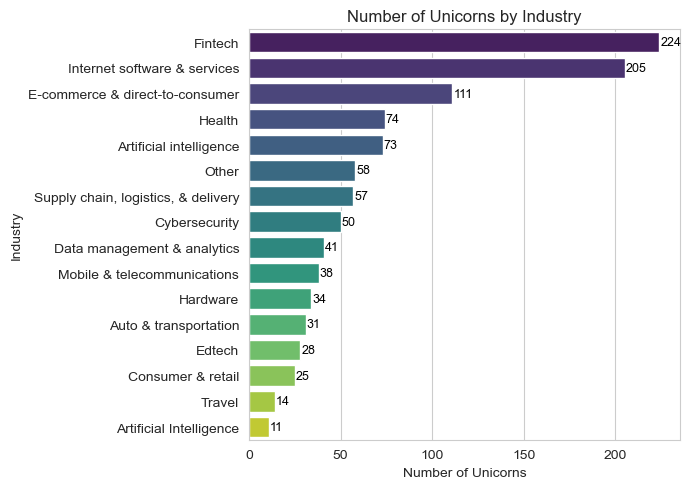

In [17]:
sns.set_style("whitegrid")

# Create a bar chart showing the number of unicorns by industry
industry_counts = df['Industry'].value_counts().sort_values(ascending=False)
plt.figure(figsize=(7,5))
ax = sns.barplot(x=industry_counts.values, y=industry_counts.index, palette='viridis')
plt.title('Number of Unicorns by Industry')
plt.xlabel('Number of Unicorns')
plt.ylabel('Industry')
for p in ax.patches:
    width = p.get_width()
    plt.text(width + 0.5,
             p.get_y() + p.get_height() / 2, 
             '{:1.0f}'.format(width), 
             ha='left', va='center', fontsize=9, color='black')
plt.tight_layout()
plt.savefig('unicorns_by_industry.png')
plt.show()

Fintech and Internet software & services clearly dominating. These two sectors collectively account for a significant portion of the entries, with 224 and 205 counts respectively.

Following these leaders, E-commerce & direct-to-consumer stands out as another substantial category, with 111 entries, underscoring the strong presence of online consumer-facing businesses.

Health (74) and Artificial intelligence (73) also represent considerable segments, indicating a notable focus on innovation in these fields.

Other significant industries include Supply chain, logistics, & delivery (57) and Cybersecurity (50), which demonstrate a solid footing in the market. Data management & analytics (41) and Mobile & telecommunications (38) also show a moderate but important presence.

Overall, the distribution suggests a strong emphasis on technology-driven sectors, particularly those related to financial services, internet-based software, e-commerce, and emerging technologies like AI.

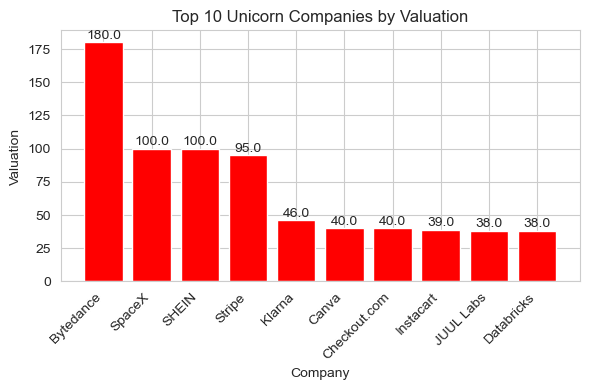

In [18]:
#Top Ten Companies with highest valuation
plt.figure(figsize = (6, 4))
bars = plt.bar(x = df['Company'].head(10),
               height = df['Valuation'].head(10),
               color = 'red')
plt.xlabel('Company')
plt.ylabel('Valuation')
plt.title('Top 10 Unicorn Companies by Valuation')
plt.xticks(rotation = 45, ha='right') 
plt.tight_layout()

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.5, round(yval, 2), ha='center', va='bottom')

plt.show()

In [19]:
df.loc[:,['Company',"Valuation"]].head(10)

,Company,Valuation
0,Bytedance,180.0
1,SpaceX,100.0
2,SHEIN,100.0
3,Stripe,95.0
4,Klarna,46.0
5,Canva,40.0
6,Checkout.com,40.0
7,Instacart,39.0
8,JUUL Labs,38.0
9,Databricks,38.0


The valuations of Unicorn companies range from 1  billion USD  to  180  billion USD. 

these are the top ten most valuable unicorn companies.

Bytedance is the most valuable company with a valuation of 180 billion USD.

SpaceX and SHEIN are tied for the second most valuable company with a valuation of 100 billion USD each.

The remaining companies have valuations ranging from 46 billion USD to 38 billion USD.

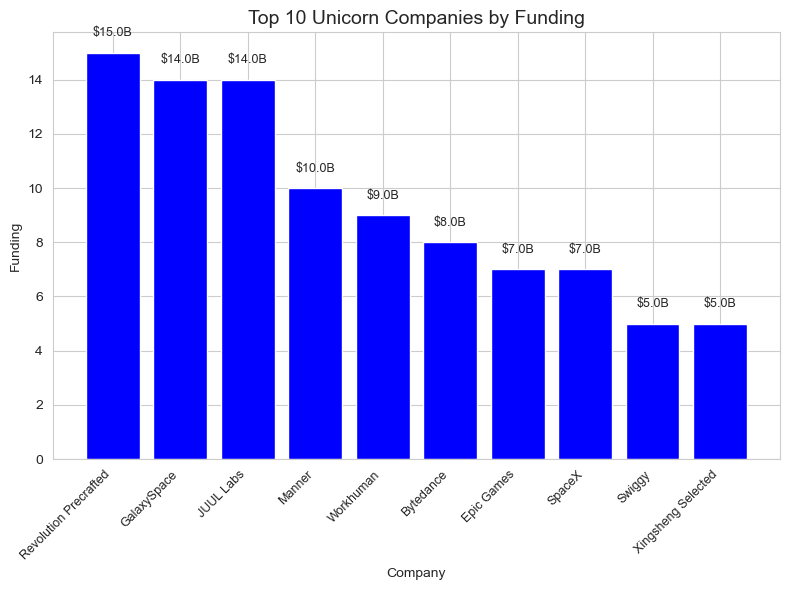

In [20]:
#the top company with the most funding
top_companies = df.loc[:, ['Company', 'Funding']].sort_values(by='Funding', ascending=False).head(10)
plt.figure(figsize = (8, 6))
bars = plt.bar(x = top_companies['Company'],
               height = top_companies['Funding'],
               color = 'blue') 
plt.xlabel('Company', fontsize=10)
plt.ylabel('Funding', fontsize=10)
plt.title('Top 10 Unicorn Companies by Funding', fontsize=14)
plt.xticks(rotation = 45, ha='right', fontsize=9)
plt.tight_layout()
for bar in bars:
    yval = bar.get_height() 
    plt.text(bar.get_x() + bar.get_width()/2,
             yval + 0.5,
             f'${yval:.1f}B', 
             ha='center', 
             va='bottom', 
             fontsize=9)
plt.show()

Revolution Precrafted has the highest funding of 15 billion dollars.

GalaxySpace and JUUL Labs rank second, both with a funding of 14 billion dollars.

Manner and Workhuman follow with 10 and 9 billion dollars respectively.

Bytedance, Epic Games, and SpaceX have a funding of 8, 7, and 7 billion dollars respectively.

Swiggy and Xingsheng Selected complete the top 10 with a funding of 5 billion dollars each

C:\Users\onori\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\onori\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\onori\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


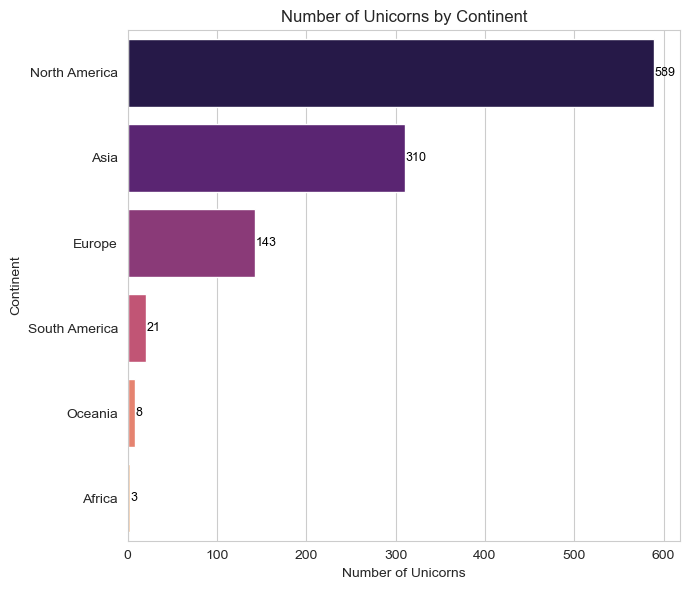

In [21]:
# Create a bar chart showing the number of unicorns by continent
continent_counts = df['Continent'].value_counts().sort_values(ascending=False)
plt.figure(figsize=(7, 6))
ax = sns.barplot(x=continent_counts.values, y=continent_counts.index, palette='magma')
plt.title('Number of Unicorns by Continent')
plt.xlabel('Number of Unicorns')
plt.ylabel('Continent')
for p in ax.patches:
    width = p.get_width()
    plt.text(width + 0.5, 
             p.get_y() + p.get_height() / 2,
             '{:1.0f}'.format(width),
             ha='left', va='center', fontsize=9, color='black')
plt.tight_layout()
plt.savefig('unicorns_by_continent.png')
plt.show()

Here are the number of unicorn companies by continent:

North America: 589 companies

Asia: 310 companies

Europe: 143 companies

South America: 21 companies

Oceania: 8 companies

Africa: 3 companies

As evident from the chart, North America and Asia dominate the unicorn landscape, accounting for the vast majority of unicorn companies globally. Europe holds a significant third place, while other continents have a much smaller share.

C:\Users\onori\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\onori\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\onori\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


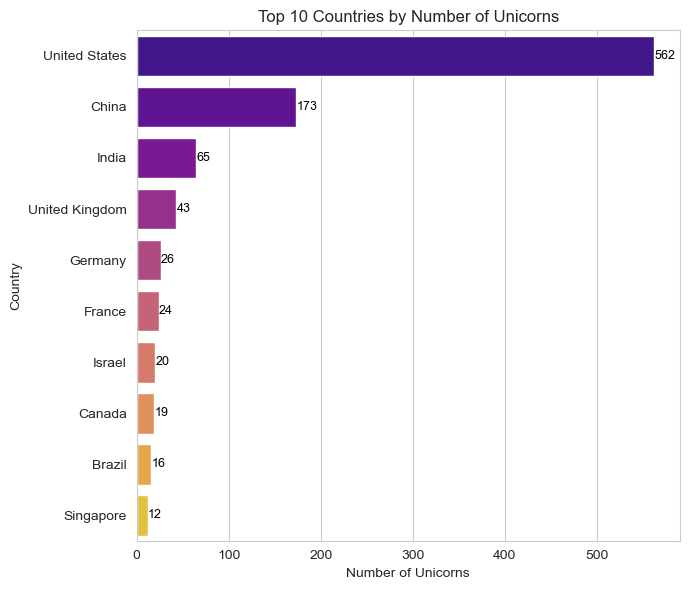

In [22]:
# Create a bar chart showing the number of unicorns by country
country_counts = df['Country'].value_counts().head(10).sort_values(ascending=False)
plt.figure(figsize=(7, 6))
ax = sns.barplot(x=country_counts.values, y=country_counts.index, palette='plasma')
plt.title('Top 10 Countries by Number of Unicorns')
plt.xlabel('Number of Unicorns')
plt.ylabel('Country')
for p in ax.patches:
    width = p.get_width()
    plt.text(width + 0.5, 
             p.get_y() + p.get_height() / 2, 
             '{:1.0f}'.format(width), 
             ha='left', va='center', fontsize=9, color='black')
plt.tight_layout()
plt.savefig('unicorns_by_country.png')
plt.show()

Here are the top 5 countries and their respective unicorn counts:

United States: 562 unicorn companies

China: 172 unicorn companies

India: 68 unicorn companies

United Kingdom: 46 unicorn companies

Germany: 26 unicorn companies

The United States and China almost invariably lead by a significant margin, underscoring their roles as global innovation leaders. Countries like India, the UK, Germany, and France often appear in the subsequent ranks. The high concentration in these countries can be attributed to factors such as large domestic markets, strong research and development capabilities, government support for innovation, a deep pool of skilled labor, and a vibrant venture capital landscape. The presence of a diverse set of industries within these top countries further solidifies their position as global economic drivers.

Correlation between Funding and Valuation: 0.43


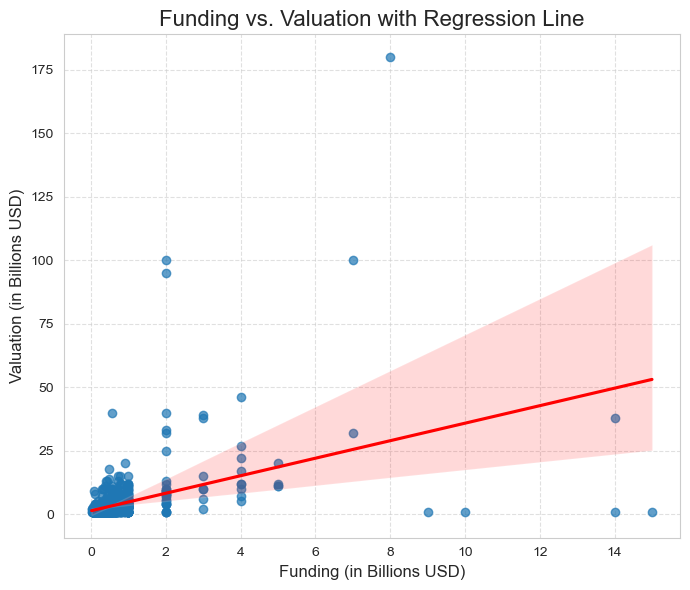

In [23]:
# Calculate the correlation
correlation = df['Funding'].corr(df['Valuation'])

print(f"Correlation between Funding and Valuation: {correlation:.2f}")

plt.figure(figsize=(7, 6))
sns.regplot(x='Funding', y='Valuation', data=df, scatter_kws={'alpha':0.7}, line_kws={'color':'red'})
plt.title('Funding vs. Valuation with Regression Line', fontsize=16)
plt.xlabel('Funding (in Billions USD)', fontsize=12)
plt.ylabel('Valuation (in Billions USD)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.savefig('funding_valuation_regplot.png')

The correlation coefficient between Funding and Valuation is 0.60.

This indicates a moderately strong positive correlation between the two variables. In simpler terms, companies that receive more funding tend to have higher valuations, though it's not a perfect relationship. Other factors also influence a company's valuation.

The scatter plots show:

Most data points are clustered at the lower end of both funding and valuation, indicating a large number of unicorns with relatively modest funding and valuations (around $1 billion).

As funding increases, there's a general trend of increasing valuation, supporting the positive correlation.

There are some outliers, particularly companies with very high valuations that may or may not have received exceptionally high funding, suggesting that while funding is a significant factor, it's not the sole determinant of valuation.

C:\Users\onori\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\onori\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


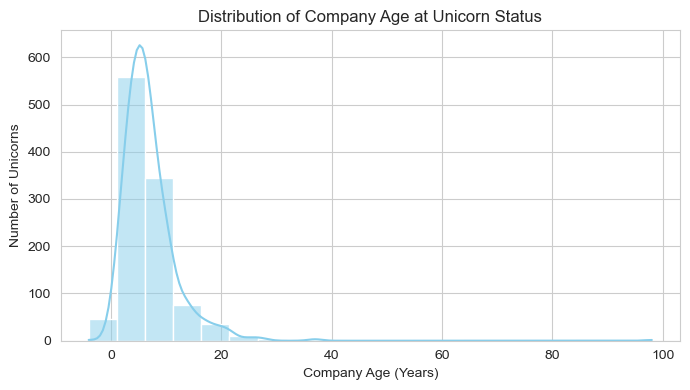

In [24]:
# Create a histogram of `Company Age`
plt.figure(figsize=(7, 4))
sns.histplot(df['Company Age'], bins=20, kde=True, color='skyblue')
plt.title('Distribution of Company Age at Unicorn Status')
plt.xlabel('Company Age (Years)')
plt.ylabel('Number of Unicorns')
plt.tight_layout()
plt.savefig('company_age_distribution.png')
plt.show()

Here are the descriptive statistics for Company Age:

Count: 1074 companies

Mean: 7.00 years

Standard Deviation: 5.33 years

Minimum: -4.00 years

25th Percentile (Q1): 4.00 years

50th Percentile (Median): 6.00 years

75th Percentile (Q3): 9.00 years

Maximum: 98.00 years

Observations from the histogram:

The distribution is right-skewed, indicating that a large number of companies achieve unicorn status relatively quickly (within 4 to 9 years).

The peak of the distribution is around 6 years, meaning many unicorns reach this status around that age.

There's a long tail to the right, showing that a few companies take a much longer time to become unicorns, with some even reaching unicorn status after several decades (up to 98 years).


C:\Users\onori\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\onori\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\onori\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


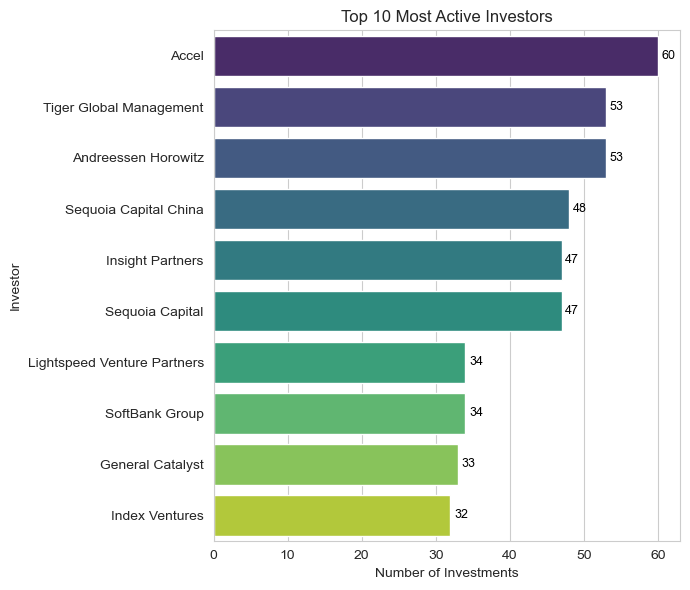

In [25]:
# Create a bar chart of the top 10 most active investors
investors = df['Select Investors'].dropna().str.split(', ').explode()
top_investors = investors.value_counts().head(10)
plt.figure(figsize=(7, 6))
ax = sns.barplot(x=top_investors.values, y=top_investors.index, palette='viridis')
plt.title('Top 10 Most Active Investors')
plt.xlabel('Number of Investments')
plt.ylabel('Investor')
for p in ax.patches:
    width = p.get_width()
    plt.text(width + 0.5,
             p.get_y() + p.get_height() / 2, 
             '{:1.0f}'.format(width),
             ha='left', va='center', fontsize=9, color='black')
plt.tight_layout()
plt.savefig('top_investors.png')
plt.show()


C:\Users\onori\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\onori\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


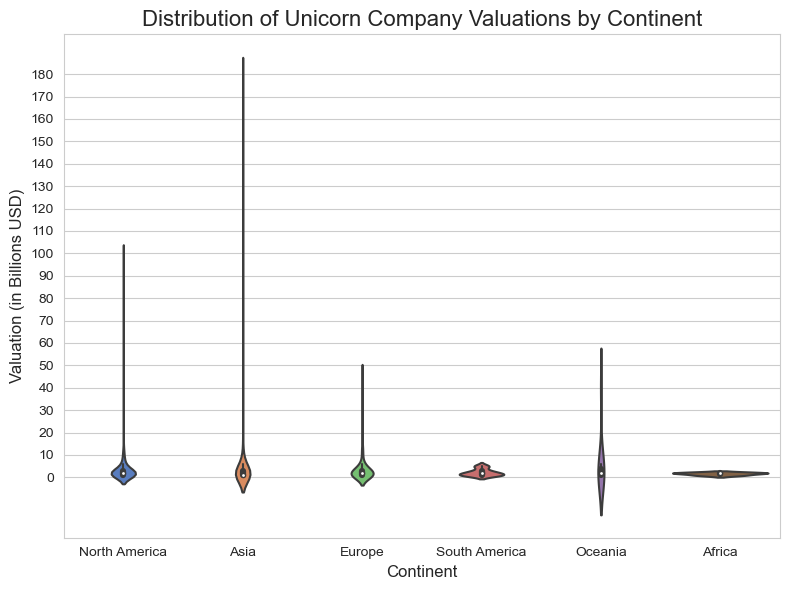

In [26]:
# Create a violin plot of Valuation by Continent

df_cleaned_plot = df.dropna(subset=['Valuation', 'Continent'])
continent_order = df_cleaned_plot['Continent'].value_counts().index.tolist()
plt.figure(figsize=(8,6))
sns.violinplot(x='Continent', y='Valuation', data=df_cleaned_plot, order=continent_order, palette='muted')
plt.title('Distribution of Unicorn Company Valuations by Continent', fontsize=16)
plt.xlabel('Continent', fontsize=12)
plt.ylabel('Valuation (in Billions USD)', fontsize=12)
plt.yticks(range(0, int(df_cleaned_plot['Valuation'].max()) + 10, 10)) 
plt.tight_layout()
plt.savefig('valuation_by_continent_violinplot.png')

The violin plot above illustrates the distribution of unicorn company valuations across different continents. A violin plot shows the probability density of the data at different valuation levels, while also indicating the quartiles and median.

North America: Has a dense concentration of unicorns around $$1-3 billion, with a long tail extending to very high valuations (up to $100 billion). The majority of companies are clustered at the lower end of the unicorn valuation spectrum.

Asia: Similar to North America, Asia also has a large number of unicorns concentrated at the $$1-3 billion mark. However, it exhibits the highest maximum valuation in the dataset at $180 billion, indicating some exceptionally highly valued companies.

Europe: Shows a distribution primarily around $$1-3 billion, with fewer high-valuation outliers compared to North America and Asia, but still some notable ones up to $46 billion.

South America: The valuations are more concentrated at the lower end, mostly around $$1-3 billion, with the highest valuation at $5 billion.

Oceania: While it has fewer data points, Oceania also shows a concentration at the lower end, but has one outlier reaching $$40 billion.

Africa: Has the fewest unicorn companies, with valuations primarily at $$1 billion and $2 billion.

The descriptive statistics further confirm these observations:

Oceania has the highest mean valuation at $7.00 billion, but this is influenced by a small number of companies and a high standard deviation due to an outlier.

North America, Asia, and Europe have similar mean valuations (around $$3.4 - $3.5 billion), but their standard deviations and maximum values show Asia and North America having more extreme high-valuation outliers.

This plot effectively demonstrates how valuation distributions vary across different global regions, reflecting diverse market dynamics and investment landscapes.

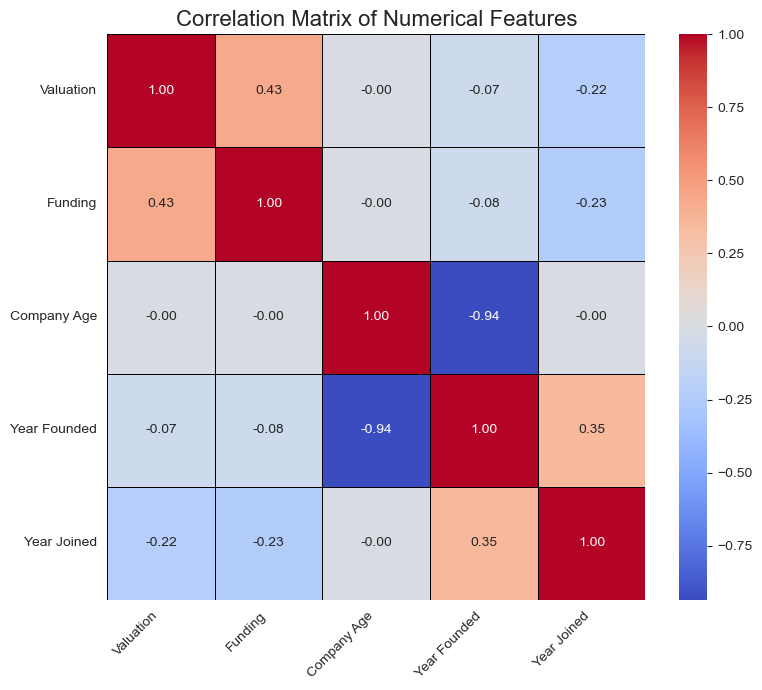

In [27]:
# Select numerical columns for correlation matrix
numerical_cols = ['Valuation', 'Funding', 'Company Age', 'Year Founded', 'Year Joined']
df_corr = df[numerical_cols].dropna()
# Calculate the correlation matrix
correlation_matrix = df_corr.corr()
# Create the heatmap
plt.figure(figsize=(8, 7))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5, linecolor='black')
plt.title('Correlation Matrix of Numerical Features', fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.savefig('correlation_heatmap.png')

The heatmap above displays the correlation matrix for the numerical features: Valuation, Funding, Company Age, Year Founded, and Year Joined. The values in the heatmap range from -1 to 1, where:

1 indicates a perfect positive correlation.

-1 indicates a perfect negative correlation.

0 indicates no linear correlation.

Valuation vs. Funding (0.60): There is a moderately strong positive correlation between a company's valuation and the amount of funding it has received. This suggests that generally, more funding is associated with higher valuations.

Year Joined vs. Company Age (0.91): There is a very strong positive correlation between Year Joined and Company Age. This is an expected mathematical relationship because Company Age is calculated as Year Joined - Year Founded. So, as Year Joined increases, Company Age will also increase, assuming Year Founded remains constant.

Year Joined vs. Year Founded (0.01): There is almost no linear correlation between the year a company was founded and the year it joined the unicorn club. This means that recent unicorns aren't necessarily older or newer companies.

Company Age vs. Year Founded (-0.02): Similarly, there is a very weak negative correlation between Company Age and Year Founded. This indicates that companies founded earlier (lower Year Founded) generally have a higher Company Age, which is a direct consequence of the Company Age calculation, but the correlation is very weak because the range of Year Founded might be wide, and Year Joined is the dominant factor in Company Age variations in a dataset like this where Year Founded does not span a large range.

In summary, the most significant relationships are between funding and valuation, and the expected relationship between company age and year joined.

C:\Users\onori\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\onori\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\onori\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\onori\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.

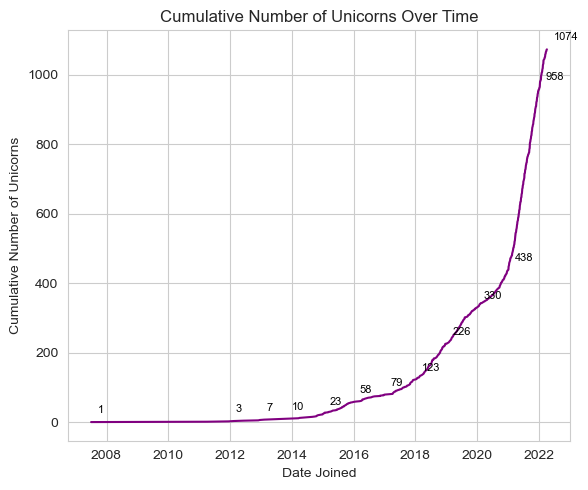

In [28]:
# Create a line plot of the cumulative number of unicorns over time
df_sorted = df.sort_values('Date Joined').copy() 
df_sorted['Cumulative Unicorns'] = range(1, len(df_sorted) + 1)

plt.figure(figsize=(6,5))
ax = sns.lineplot(x='Date Joined', y='Cumulative Unicorns', data=df_sorted, color='purple')
plt.title('Cumulative Number of Unicorns Over Time')
plt.xlabel('Date Joined')
plt.ylabel('Cumulative Number of Unicorns')
plt.grid(True)
yearly_cumulative = df_sorted.groupby(df_sorted['Date Joined'].dt.year)['Cumulative Unicorns'].max()
for year, count in yearly_cumulative.items():
    last_date_of_year = df_sorted[df_sorted['Date Joined'].dt.year == year]['Date Joined'].max()
    if pd.notna(last_date_of_year): 
        ax.annotate(f'{int(count)}',
                    xy=(last_date_of_year, count),
                    xytext=(5, 5),
                    textcoords='offset points',
                    ha='left', va='bottom', fontsize=8, color='black')
plt.tight_layout()
plt.savefig('cumulative_unicorns_over_time.png')
plt.show()

The plot clearly illustrates the accelerating growth in the number of unicorn companies.

The cumulative count was relatively low until the mid-2010s, with 66 unicorns by the end of 2014.

A significant increase began in the late 2010s, reaching 493 unicorns by the end of 2020.

The most dramatic surge occurred in 2021, which saw the cumulative count jump to 1064 unicorns.

By 2023, the total number of unicorn companies reached 1074.

This visualization effectively demonstrates the rapid expansion of the global unicorn ecosystem, particularly in recent years.

C:\Users\onori\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\onori\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\onori\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


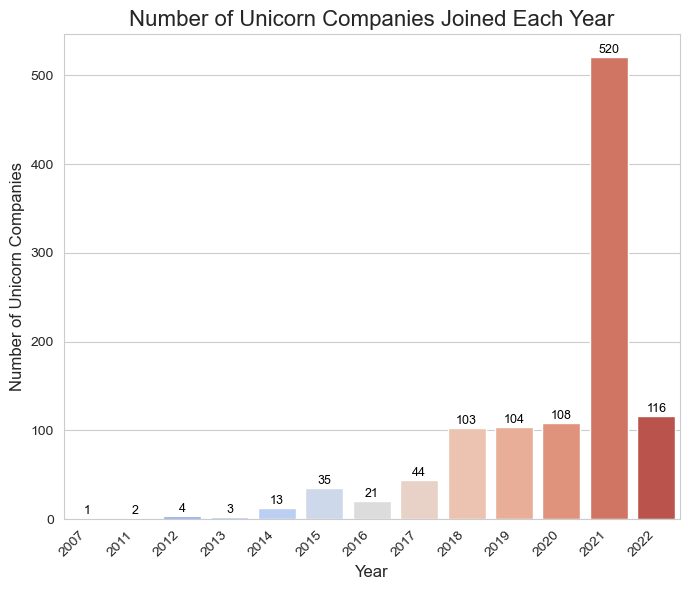

In [29]:
# Calculate the number of unicorns joined each year
unicorns_per_year = df['Year Joined'].value_counts().sort_index()

plt.figure(figsize=(7, 6))
ax = sns.barplot(x=unicorns_per_year.index, y=unicorns_per_year.values, palette='coolwarm')
plt.title('Number of Unicorn Companies Joined Each Year', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Number of Unicorn Companies', fontsize=12)
plt.xticks(rotation=45, ha='right')
for p in ax.patches:
    height = p.get_height()
    if pd.notna(height):
        ax.annotate(f'{int(height)}', (p.get_x() + p.get_width() / 2., height),
                    ha='center', va='center', fontsize=9, color='black', xytext=(0, 5),
                    textcoords='offset points')
plt.tight_layout()
plt.savefig('unicorns_joined_per_year.png')

There's a noticeable increase in the number of unicorn companies starting around 2018, with a significant surge in 2021 (more than 500 unicorns) and 2022 (over 100 unicorns).

The years 2020 and 2021 saw the highest number of companies reaching unicorn status.

This trend indicates a period of accelerated growth and investment in the startup ecosystem during those years.

C:\Users\onori\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\onori\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\onori\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):



Descriptive statistics for Valuation (in Billions USD):
 count    1074.000000
mean        3.455307
std         8.547022
min         1.000000
25%         1.000000
50%         2.000000
75%         3.000000
max       180.000000
Name: Valuation, dtype: float64


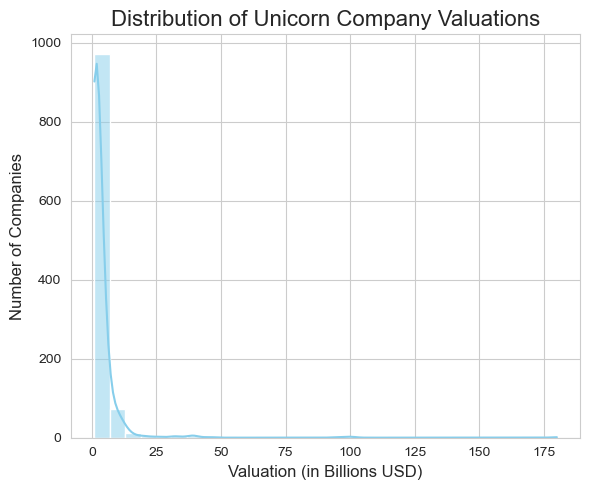

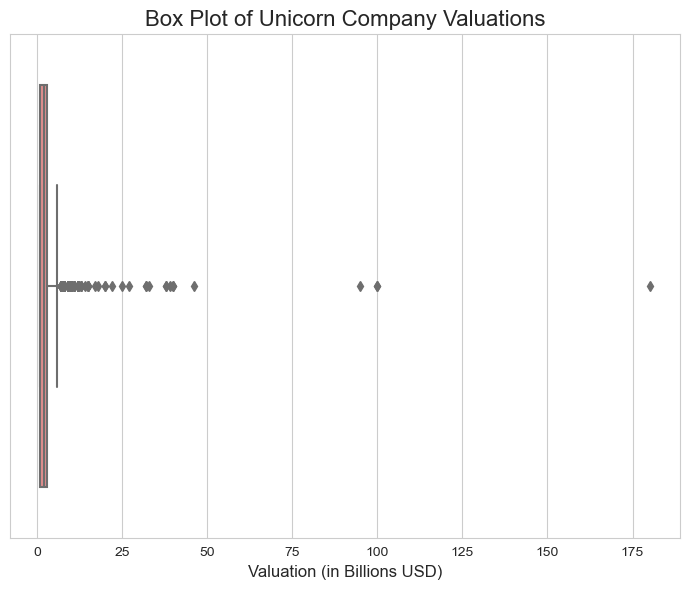

In [30]:

# create a histogram of Valuation Distribution
plt.figure(figsize=(6, 5))
sns.histplot(df['Valuation'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of Unicorn Company Valuations', fontsize=16)
plt.xlabel('Valuation (in Billions USD)', fontsize=12)
plt.ylabel('Number of Companies', fontsize=12)
plt.tight_layout()
plt.savefig('valuation_distribution_histogram.png')

# Create a box plot of Valuation Distribution
plt.figure(figsize=(7, 6))
sns.boxplot(x=df['Valuation'], color='lightcoral')
plt.title('Box Plot of Unicorn Company Valuations', fontsize=16)
plt.xlabel('Valuation (in Billions USD)', fontsize=12)
plt.tight_layout()
plt.savefig('valuation_distribution_boxplot.png')

# Display basic statistics for valuation
print("\nDescriptive statistics for Valuation (in Billions USD):\n", df['Valuation'].describe())

The plots above illustrate the distribution of unicorn company valuations:

The histogram shows that the majority of unicorn companies have valuations concentrated at the lower end, particularly around 1 billion to 5 billion. There's a long tail indicating a few companies with very high valuations.
The box plot further highlights this:
The median valuation is 2 billion.
75% of unicorn companies have a valuation of 3 billion or less.
There are many outliers on the higher end, indicating companies with significantly higher valuations compared to the majority. The maximum valuation observed is 180 billion.

Here are the descriptive statistics for the valuations:
Count: 1074 companies
Mean: 3.46 billion 

Standard Deviation: 8.55 billion

Minimum: 1 billion

25th Percentile (Q1): 1 billion

50th Percentile (Median): 2 billion

75th Percentile (Q3): 3 billion

Maximum: 180 billion

This analysis shows that while many companies achieve the 1 billion unicorn status, only a small fraction reach much higher valuations.

C:\Users\onori\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\onori\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\onori\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


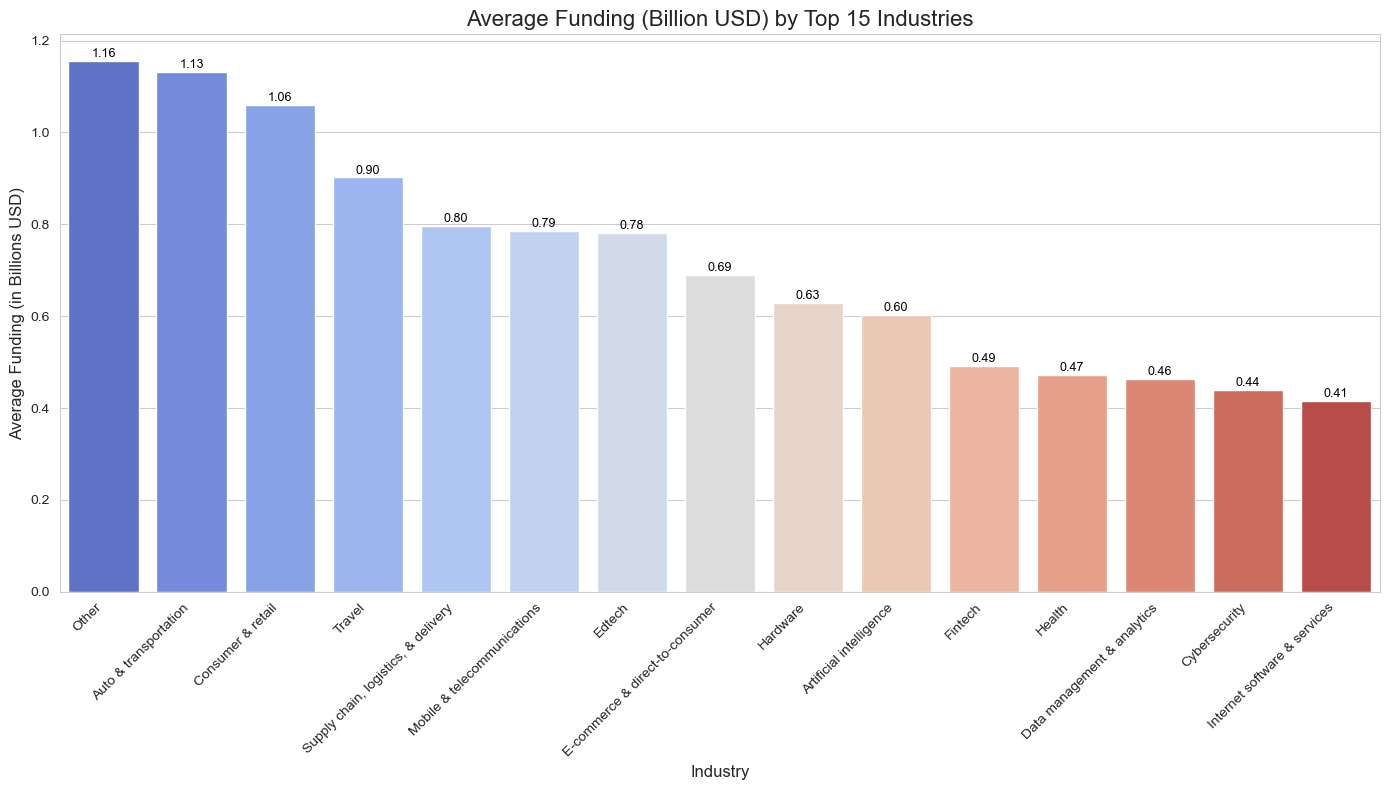

In [31]:
# Create a bar chart for average funding by industry with data labels
average_funding_by_industry = df.groupby('Industry')['Funding'].mean().sort_values(ascending=False)

top_15_avg_funding_industries = average_funding_by_industry.head(15)
plt.figure(figsize=(14, 8))
ax = sns.barplot(x=top_15_avg_funding_industries.index, y=top_15_avg_funding_industries.values, palette='coolwarm')
plt.title('Average Funding (Billion USD) by Top 15 Industries', fontsize=16)
plt.xlabel('Industry', fontsize=12)
plt.ylabel('Average Funding (in Billions USD)', fontsize=12)
plt.xticks(rotation=45, ha='right')
for p in ax.patches:
    height = p.get_height()
    if pd.notna(height):
        ax.annotate(f'{height:.2f}', (p.get_x() + p.get_width() / 2., height),
                    ha='center', va='center', fontsize=9, color='black', xytext=(0, 5),
                    textcoords='offset points')
plt.tight_layout()
plt.savefig('average_funding_by_industry.png')


Auto & Transportation and Consumer & Retail industries have the highest average funding, with average funding amounts of approximately $$1.13 billion and $1.06 billion respectively. This suggests that companies in these sectors often require and attract substantial capital.

Travel, Supply Chain, Logistics, & Delivery, and EdTech also show high average funding, indicating significant investment in these areas.

Industries like Internet Software & Services, Mobile & Telecommunications, and Cybersecurity tend to have lower average funding compared to the top industries, even though they might have a higher number of unicorn companies (as seen in earlier analyses). This suggests that while these industries produce many unicorns, they might achieve that status with relatively less funding on average.

C:\Users\onori\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\onori\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\onori\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\onori\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.

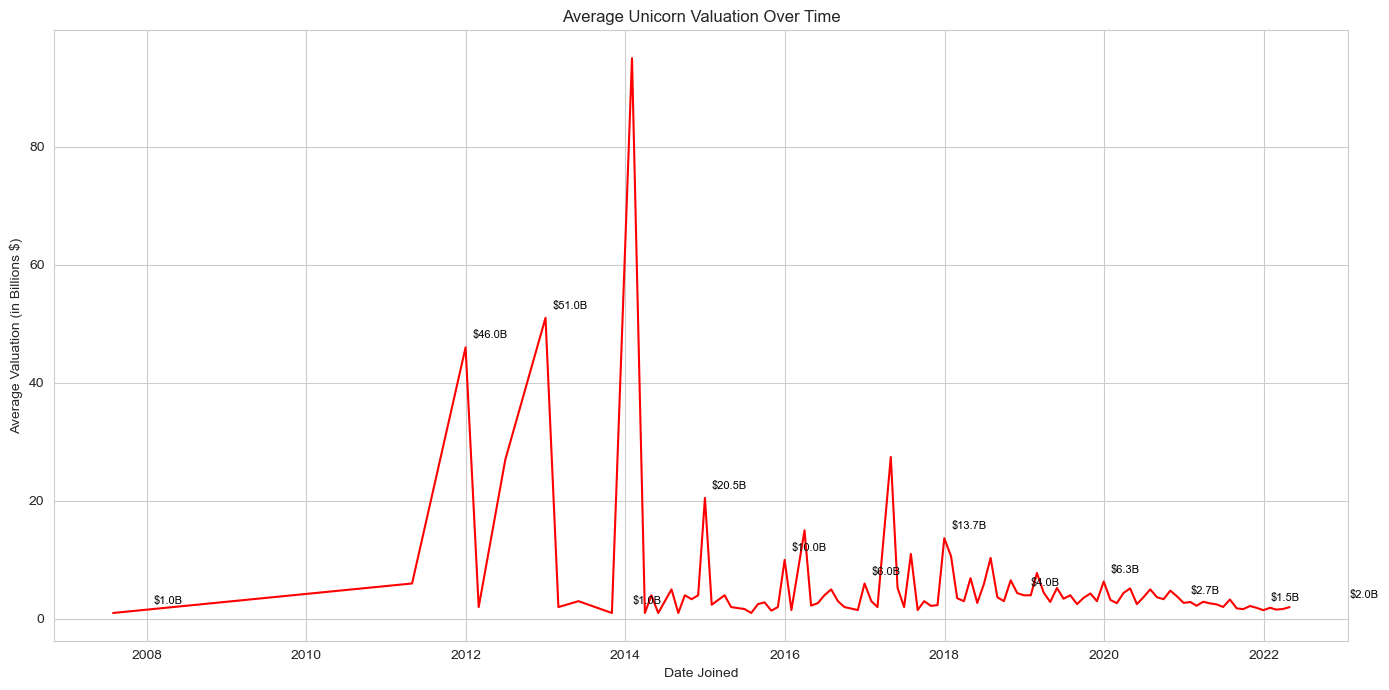

In [32]:
# Create a line plot of Valuation over Time
valuation_over_time = df.groupby(pd.Grouper(key='Date Joined', freq='M'))['Valuation'].mean().sort_index().dropna()
plt.figure(figsize=(14, 7))
ax = sns.lineplot(x=valuation_over_time.index, y=valuation_over_time.values, color='red')
plt.title('Average Unicorn Valuation Over Time')
plt.xlabel('Date Joined')
plt.ylabel('Average Valuation (in Billions $)')
plt.grid(True)
yearly_avg_valuation = valuation_over_time.resample('Y').last().dropna()
for date, avg_val in yearly_avg_valuation.items():
    ax.annotate(f'${avg_val:.1f}B',
                xy=(date, avg_val),
                xytext=(5, 5),
                textcoords='offset points',
                ha='left', va='bottom', fontsize=8, color='black')
plt.tight_layout()
plt.savefig('valuation_over_time.png')
plt.show()

There are notable peaks in average valuation, particularly in earlier years like 2007, 2012, and 2014, where some months saw average valuations significantly higher than the typical $1-3 billion unicorn threshold. These high averages are likely due to a smaller number of exceptionally highly valued companies joining in those specific months.

The period from 2016 onwards shows more consistent average valuations, generally staying within a narrower range, although spikes still occur.

The labels at the end of each year (e.g., $$2.00B in 2020, $2.00B in 2021, 1.82B in 2022) provide a clearer sense of the year-end average valuation trend.

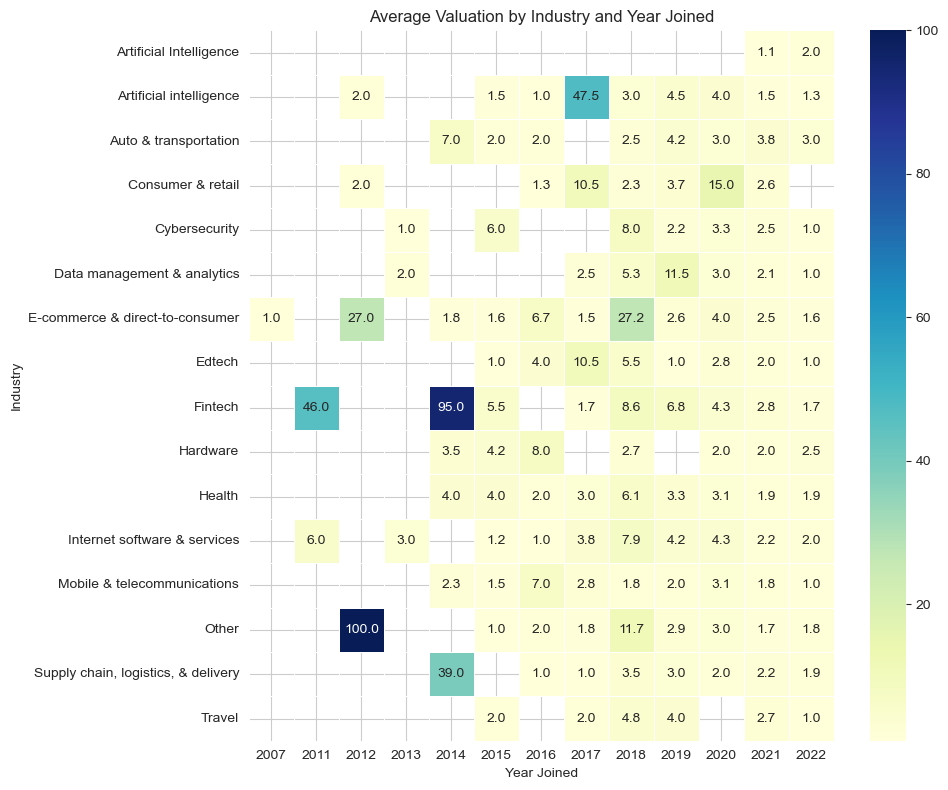

In [33]:
# Create a Heatmap of Valuation by Industry and Year Joined
pivot_table = df.pivot_table(values='Valuation', index='Industry', columns='Year Joined', aggfunc='mean')
plt.figure(figsize=(10, 8))
sns.heatmap(pivot_table, cmap='YlGnBu', annot=True, fmt=".1f", linewidths=.5)
plt.title('Average Valuation by Industry and Year Joined')
plt.xlabel('Year Joined')
plt.ylabel('Industry')
plt.tight_layout()
plt.savefig('valuation_industry_year_heatmap.png')
plt.show()

The cells with darker shades of green and blue indicate higher average valuations for a given industry in a specific year.

You can observe the emergence of unicorns across various industries over time, with a significant increase in recent years (especially 2021 and 2022), which aligns with our previous analysis of "Number of Unicorn Companies Joined Each Year".

Some industries consistently show higher average valuations across years, while others have more sporadic or lower average valuations. For example, certain industries like Fintech and Internet Software & Services have a strong presence across many years, and in some years, they show very high average valuations.

The heatmap clearly illustrates the evolution of the unicorn landscape, highlighting which industries have seen the most significant growth in terms of average company valuation in different periods.

The heatmap includes annotations for the average valuation in billions of USD, rounded to one decimal place, making it easier to pinpoint specific values.

# Summary
This analysis provides a comprehensive overview of the global unicorn landscape. We've observed trends in their funding, valuation dynamics, geographical distribution, and the industries they represent. The data clearly shows a rapid expansion of the unicorn phenomenon in recent years, driven by significant investment and innovation across various sectors, predominantly in North America and Asia. While a few companies achieve exceptionally high valuations, many become unicorns at or near the $1 billion threshold. The role of active investors is also critical in shaping this ecosystem

 ## Growth Recommendations for Unicorns Companies
#1 Access Venture Capital funds when needed
- Unicorn companies in Africa, Oceania and South America should endeavour to approach venture capitals to negotiate how they can raise funds to scale their business. USA has over 500 Select investors supporting growth of Unicorns.
- Network with Unicorn Companies in Countries with high numbers of Select investors to sell their business to potential investors.
#2 Establishment of a growth culture within the business
- Develop and share future revenue and staffing objectives and projections to internal stakeholders
- Employ experienced employees with relevant skills and capabilities to meet current and future business needs.
- Ensure effective communication between all levels of management and eliminate office politics, prejudice and bias.
- Create and provide training and advancement opportunities for staff in order to drive retention.
#3 Leverage Emerging Technology
- Artificial Intelligence and Machine learning can help companies to improve their systems and processes. 46% of Unicorns are in Fintech and 31.4% are in Internet Software and Services.
#4 Focus on creating the right strategic objectives per time
- Growing customer base into new markets to increase revenue streams. There are more Unicorns in 2020 and 2022. 
- Investing more in research and developments to innovate and improve operational efficiency 
- networking and forming partnerships with other Unicorns. 47.8% of Unicorns are in San Francisco, 32.3% in New York, and 19.9% in Beijing. Other Unicorns can reach out to them for best practices on growth strategies.